Variables: ['Year', 'Location', 'ROI', 'VisualScoreDate', 'VisualScore', 'FlightDate', 'FlightFolder', 'DeltaDate']
Lodging scores by year:
VisualScore    0   1   2   3    5  7   8  10  15  20  ...  50  55  60  65  70  \
Year                                                  ...                       
2016           1   0   0   1    1  0   0   4   6   4  ...   6   6   1   3   1   
2017           0   0   0   0    0  0   0   2  10   9  ...   0   0  10   7  18   
2018         725  12  16  30  108  0   3  97  80  51  ...  35  14  48  55  83   
2019         288   0   1   3   68  0   3  73  48  48  ...  20  25  32  68  29   
2020         632  57   1  43  171  1  48  90  72  50  ...  57  15  28   2   2   
2021          58   0   0  18   26  0   0  40  29  22  ...  37  19  30  50  73   

VisualScore   75  80  85  90  Total  
Year                                 
2016           1   0   0   0     56  
2017           5   0   0   0     88  
2018         120  99   0   0   1784  
2019          23   0 

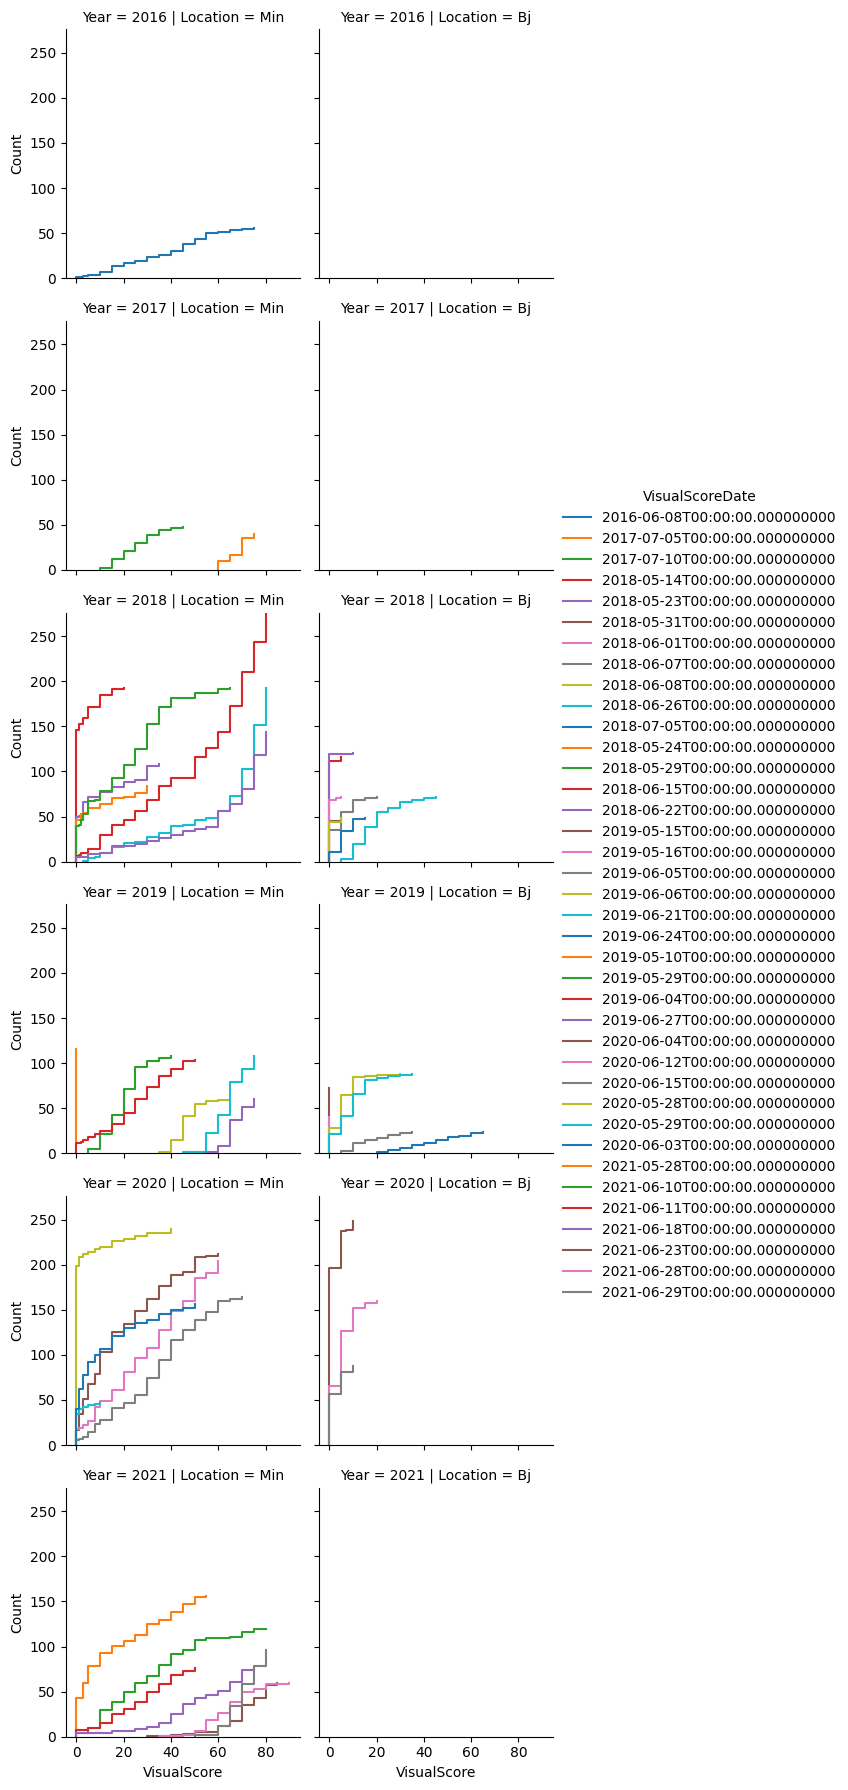

done


In [10]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

#dataset_csv = os.path.join('..','Lodging_scores_anders.csv')

df_lodging = pd.read_csv('Lodging_scores_anders.csv', parse_dates=['VisualScoreDate','FlightDate'])

print('Variables:', df_lodging.keys().to_list())

print('Lodging scores by year:')
df_lodging_by_year = df_lodging.groupby(['Year','VisualScore'])['ROI'].count().unstack()
df_lodging_by_year[df_lodging_by_year.isna()] = 0
df_lodging_by_year = df_lodging_by_year.astype(int)
df_lodging_by_year['Total'] = df_lodging_by_year.sum(axis=1)
print(df_lodging_by_year)


# Plot cumulative distribution functions of the lodging scores per year, location and scoring date
# TODO: Colour by date/month between 1 May and 1 Juli
G = sns.FacetGrid(df_lodging, col='Location', row='Year', hue='VisualScoreDate', palette='tab10')
G.map(sns.ecdfplot, 'VisualScore', stat='count')
G.add_legend()
plt.show()

# TODO: Plot examples of different lodging scores


print('done')
